In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
%matplotlib inline

In [5]:
conn = sqlite3.connect('data/sakila.db')

data = pd.read_sql('''
    SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id == customer.customer_id
    INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
    INNER JOIN store ON inventory.store_id == store.store_id
    INNER JOIN address ON store.address_id == address.address_id
    INNER JOIN city ON address.city_id == city.city_id
    INNER JOIN film ON inventory.film_id == film.film_id
    ;
''', conn, index_col='rental_id', parse_dates=['rental_date', 'return_date'])

Overview

In [6]:
data.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17


In [12]:
data.describe(include=[int,float])

,store_id,film_rental_duration,film_rental_rate,film_replacement_cost
count,16044.000000,16044.00000,16044.000000,16044.000000
mean,1.506171,4.93549,2.942630,20.215443
std,0.499978,1.40169,1.649678,6.081771
min,1.000000,3.00000,0.990000,9.990000
25%,1.000000,4.00000,0.990000,14.990000
50%,2.000000,5.00000,2.990000,20.990000
75%,2.000000,6.00000,4.990000,25.990000
max,2.000000,7.00000,4.990000,29.990000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16044 entries, 1 to 16049
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   rental_date            16044 non-null  datetime64[ns]
 1   return_date            15861 non-null  datetime64[ns]
 2   customer_lastname      16044 non-null  object        
 3   store_id               16044 non-null  int64         
 4   rental_store_city      16044 non-null  object        
 5   film_title             16044 non-null  object        
 6   film_rental_duration   16044 non-null  int64         
 7   film_rental_rate       16044 non-null  float64       
 8   film_replacement_cost  16044 non-null  float64       
 9   film_rating            16044 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 1.3+ MB


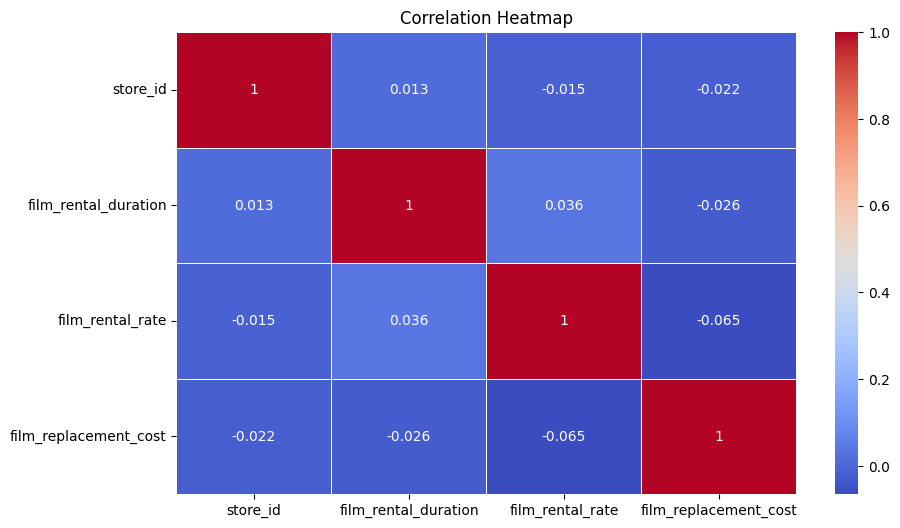

In [45]:
data_Corretion = data.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10,6))
plt.title("Correlation Heatmap")
sns.heatmap(data_Corretion,cmap ='coolwarm',annot= True,linewidths = 0.5)
plt.show()

4.94


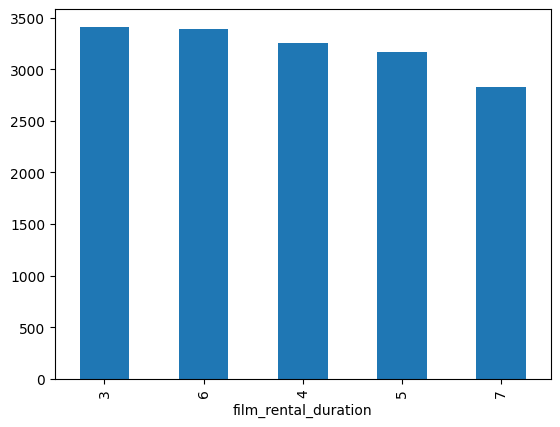

In [69]:
# What's the mean of film_rental_duration?
print(data["film_rental_duration"].mean().round(2))
# Show a bar plot with all the durations.
data["film_rental_duration"].value_counts().plot(kind = "bar")
plt.show()

In [62]:
# What's the most common rental duration?
data["film_rental_duration"].value_counts().index[0]

3

0.99


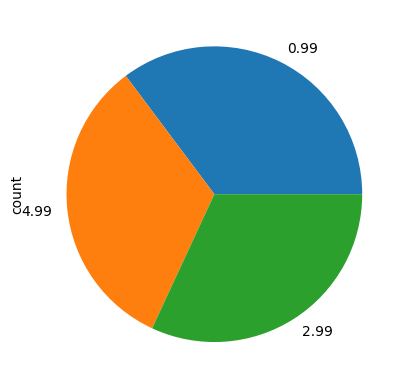

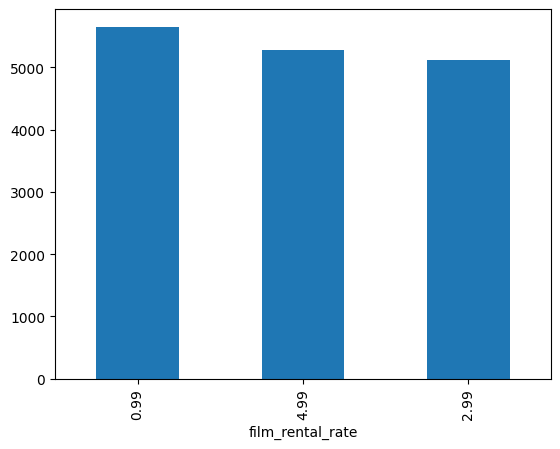

pie chart is more informarmative than bar


In [78]:
# What is the most common rental rate?
rental_rate = data["film_rental_rate"].value_counts()
print(rental_rate.index[0])
# Show a pie plot with all possible rental rates.
rental_rate.plot(kind="pie")
plt.show()
# Show a bar plot with all possible rental rates.
rental_rate.plot(kind="bar")
plt.show()
# Which plot you think fits the best in this case? Why?
print("pie chart is more informarmative than bar")

film_replacement_cost
22.99    1044
27.99     958
21.99     912
29.99     868
12.99     864
20.99     863
14.99     821
13.99     803
11.99     749
25.99     740
26.99     737
10.99     720
28.99     716
18.99     696
17.99     691
23.99     690
9.99      684
19.99     657
16.99     639
24.99     633
15.99     559
Name: count, dtype: int64


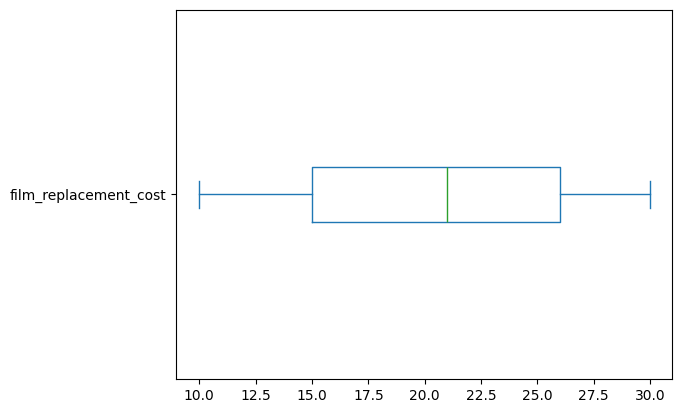

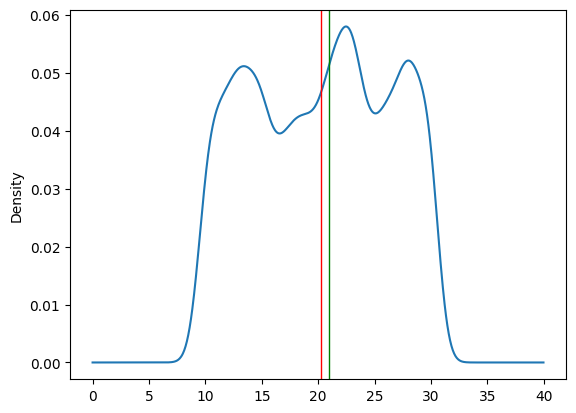

In [105]:
# How is the replacement cost distributed?
print(data["film_replacement_cost"].value_counts()) 
# Show a box plot of the replacement costs.
data["film_replacement_cost"].plot(kind="box",vert = False)
plt.show()
# Show a density plot of the replacement costs.
# Add a red line on the mean.
# Add a green line on the median median.
data["film_replacement_cost"].plot(kind = "density")
plt.axvline(data["film_replacement_cost"].mean(),color = "red",linewidth = 1)
plt.axvline(data["film_replacement_cost"].median(),color = "green",linewidth = 1)
plt.show()

film_rating
PG-13    3585
NC-17    3293
PG       3212
R        3181
G        2773
Name: count, dtype: int64


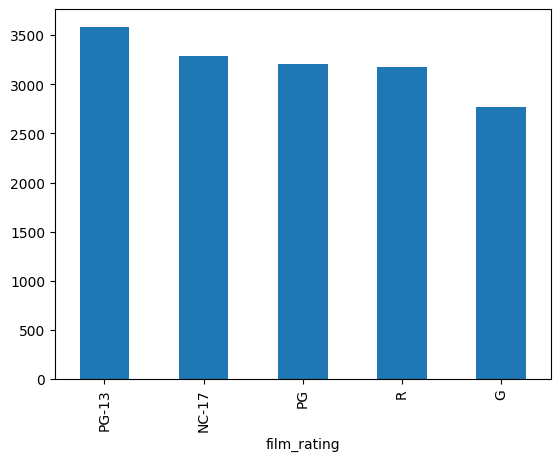

In [108]:
# How many films of each rating do we have?
data_filmrating = data["film_rating"]
# Show the raw count of each film rating.
print(data_filmrating.value_counts())
# Show a bar plot with all possible film ratings.
data_filmrating.value_counts().plot(kind = "bar")
plt.show()


<Axes: title={'center': 'film_replacement_cost'}, xlabel='[film_rating]'>

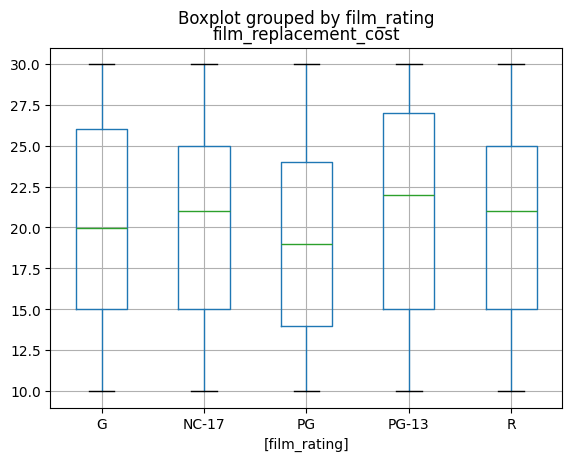

In [135]:
# Does the film replacement cost vary depending on film rating?
data[["film_rating","film_replacement_cost"]].boxplot(by="film_rating")
# In the United States, film classification is a voluntary process with the ratings issued by the Motion Picture Association of America (MPAA) via the Classification and Rating Administration (CARA).

# G (General Audiences): All Ages are Admitted.
# PG (Parental Guidance Suggested): Some Material May Not Be Suitable for Children.
# PG-13 (Parents Strongly Cautioned): Some Material May Be Inappropriate for Children Under 13.
# R (Restricted): Under 17 Requires Accompanying Parent or Adult Guardian.
# NC-17 (Adults Only): No One 17 and Under Admitted.
# Show a grouped box plot per film rating with the film replacement costs.

In [193]:
# Add and calculate a new rental_days column
# This numeric column should have the count of days between rental_date and return_date.
data["rental_days"] = data.loc[:,["rental_date","return_date"]].apply(lambda x: (x.values[1]- x.values[0]).astype("timedelta64[D]").astype(int),axis = 1)
data.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_days
rental_id,,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G,1
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R,3
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G,7
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R,9
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17,8


C:\Users\mubas\AppData\Local\Temp\ipykernel_18832\2325145875.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data["rental_days"],shade = True,bw_adjust = 1)


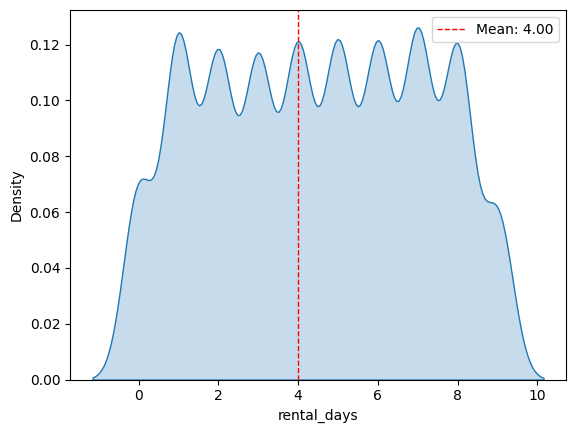

In [243]:
# Analyze the distribution of rental_days
# Calculate the mean of rental_days.
mean_rentaldays = data["rental_days"].mean().round(0)
# Show a density (KDE) of rental_days.

sns.kdeplot(data["rental_days"],shade = True,bw_adjust = 1)
plt.axvline(mean_rentaldays,color = "red",linewidth = 1,label=f'Mean: {mean_rentaldays:.2f}',linestyle='--')
plt.legend()
plt.show()

In [246]:
# Add and calculate a new film_daily_rental_rate column
# This value should be the division of film_rental_rate by film_rental_duration.
data["film_daily_rental_rate"] = data["film_rental_rate"]/data["film_rental_duration"]
data.head()


,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_days,film_daily_rental_rate
rental_id,,,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G,1,0.427143
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R,3,0.427143
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G,7,0.427143
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R,9,0.165000
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17,8,0.598000


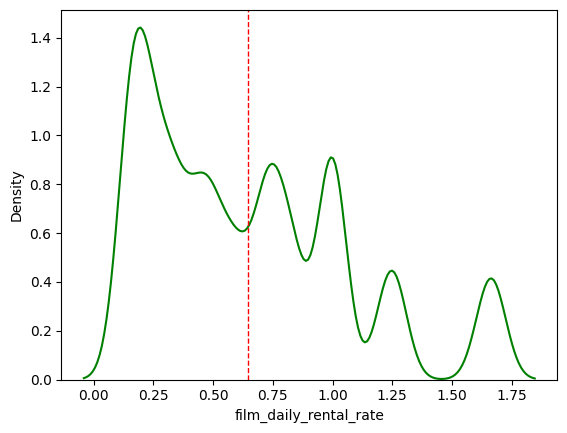

In [254]:
# Analyze the distribution of film_daily_rental_rate
# Calculate the mean of film_daily_rental_rate.
# Show a density (KDE) of film_daily_rental_rate.
sns.kdeplot(data["film_daily_rental_rate"],bw_adjust= 1,color = "green")
plt.axvline(data["film_daily_rental_rate"].mean(),color = "red",linewidth=1,linestyle ="--" )
plt.show()

In [265]:
# List 10 films with the lowest daily rental rate
print(data[(data["film_daily_rental_rate"]== data["film_daily_rental_rate"].min())]["film_title"].unique())
print("any 10 from here is a answer")


['ROMAN PUNK' 'BORROWERS BEDAZZLED' 'GUN BONNIE' 'GREEDY ROOTS'
 'PATIENT SISTER' 'GANDHI KWAI' 'VALENTINE VANISHING'
 'UNFORGIVEN ZOOLANDER' 'LIGHTS DEER' 'STORY SIDE' 'MOON BUNCH'
 'NOTTING SPEAKEASY' 'SHEPHERD MIDSUMMER' 'CHRISTMAS MOONSHINE'
 'EMPIRE MALKOVICH' 'WESTWARD SEABISCUIT' 'MUSIC BOONDOCK'
 'GHOSTBUSTERS ELF' 'SILENCE KANE' 'LEGEND JEDI' 'CELEBRITY HORN'
 'NOTORIOUS REUNION' 'DRACULA CRYSTAL' 'CURTAIN VIDEOTAPE' 'SIEGE MADRE'
 'GREASE YOUTH' 'STREAK RIDGEMONT' 'BRIDE INTRIGUE' 'DECEIVER BETRAYED'
 'JEDI BENEATH' 'SMOKING BARBARELLA' 'CRUELTY UNFORGIVEN'
 'VIETNAM SMOOCHY' 'ROOM ROMAN' 'TOWERS HURRICANE' 'WOLVES DESIRE'
 'CITIZEN SHREK' 'PRIMARY GLASS' 'EARTH VISION' 'REBEL AIRPORT'
 'CARRIE BUNCH' 'SPIRIT FLINTSTONES' 'CLOCKWORK PARADISE'
 'LOVERBOY ATTACKS' 'CANYON STOCK' 'ANONYMOUS HUMAN' 'HOLLYWOOD ANONYMOUS'
 'SMOOCHY CONTROL' 'LAWRENCE LOVE' 'HOOK CHARIOTS' 'OKLAHOMA JUMANJI'
 'GILBERT PELICAN' 'TEXAS WATCH']
any 10 from here is a answer


In [288]:
# List 10 films with the highest daily rental rate
max_rate =  data["film_daily_rental_rate"].max()
print(data[(data["film_daily_rental_rate"]== data["film_daily_rental_rate"].max())]["film_title"].unique())
print(f"these filims have daily rental rate { max_rate:.2f}.any 10 from here is a answer")



['KING EVOLUTION' 'MINDS TRUMAN' 'TEEN APOLLO' 'SHOW LORD' 'WIFE TURN'
 'BACKLASH UNDEFEATED' 'AMERICAN CIRCUS' 'MIDSUMMER GROUNDHOG'
 'BEHAVIOR RUNAWAY' 'KISSING DOLLS' 'CLERKS ANGELS' 'TITANIC BOONDOCK'
 'AUTUMN CROW' 'DAY UNFAITHFUL' 'NIGHTMARE CHILL' 'DOORS PRESIDENT'
 'MAIDEN HOME' 'MISSION ZOOLANDER' 'SUNRISE LEAGUE' 'DARKO DORADO'
 'SATURDAY LAMBS' 'CARIBBEAN LIBERTY' 'TRAP GUYS' 'SCORPION APOLLO'
 'PARK CITIZEN' 'SECRETS PARADISE' 'VELVET TERMINATOR' 'FOOL MOCKINGBIRD'
 'SATISFACTION CONFIDENTIAL' 'ZORRO ARK' 'RANGE MOONWALKER'
 'SCARFACE BANG' 'BEAST HUNCHBACK' 'MINE TITANS' 'TELEGRAPH VOYAGE'
 'SUIT WALLS' 'GARDEN ISLAND' 'STRANGER STRANGERS' 'CASUALTIES ENCINO'
 'TIES HUNGER' 'BILKO ANONYMOUS' 'DUDE BLINDNESS' 'TORQUE BOUND'
 'SUGAR WONKA' 'INNOCENT USUAL' 'FLINTSTONES HAPPINESS' 'HUSTLER PARTY'
 'TYCOON GATHERING' 'FLASH WARS' 'STING PERSONAL' 'CASPER DRAGONFLY'
 'VIRTUAL SPOILERS' 'PATHS CONTROL' 'PANIC CLUB' 'HEARTBREAKERS BRIGHT'
 'DAUGHTER MADIGAN' 'ITALIAN AFRICAN' 'AC

In [292]:
# How many rentals were made in Lethbridge city?
data[(data["rental_store_city"]=="Lethbridge")].shape[0]

7923

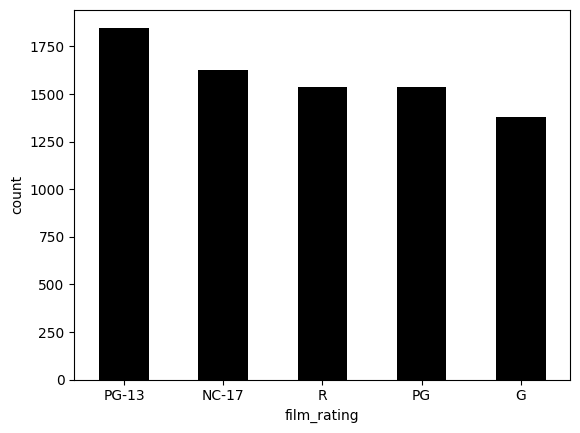

In [324]:
# How many rentals of each film rating were made in Lethbridge city?
# Show a bar plot with each film rating count.
data_lethbridge = data[(data["rental_store_city"]=="Lethbridge")]["film_rating"].value_counts()
sns.barplot(data_lethbridge,width=0.5,color="black")

plt.show()

In [298]:
# How many rentals were made in Woodridge city with rental duration higher than 5 days?
data[(data["rental_store_city"]=="Woodridge")&(data["film_rental_duration"]> 5)].shape[0]

3186

In [302]:
# How many rentals were made at the store with id 2 or with replacement cost lower than 10.99 USD?
data[(data["store_id"]==2)|(data["film_replacement_cost"]<10.99)].shape[0]

8444